### Training of ML algorithms on our financial Dataset

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
data = pd.read_csv('Datasets/sp500.csv')
data.Price_change = data.Price_change.astype(int)
data

,Date,Open,Close,Volume,Price_change,date
0,2009-01-02,902.989990,931.799988,4048270000,1,0
1,2009-01-05,929.169983,927.450012,5413910000,-1,2009-01-05
2,2009-01-06,931.169983,934.700012,5392620000,1,2009-01-06
3,2009-01-07,927.450012,906.650024,4704940000,-1,2009-01-07
4,2009-01-08,905.729980,909.729980,4991550000,1,2009-01-08
...,...,...,...,...,...,...
3016,2020-12-24,3694.030029,3703.060059,1883780000,1,2020-12-24
3017,2020-12-28,3723.030029,3735.360107,3535460000,1,2020-12-28
3018,2020-12-29,3750.010010,3727.040039,3393290000,-1,2020-12-29
3019,2020-12-30,3736.189941,3732.040039,3154850000,1,2020-12-30


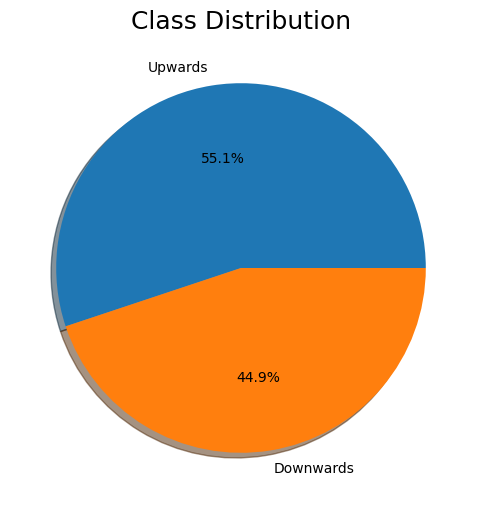

,Open,Close,Volume,Price_change
count,3021.000000,3021.000000,3.021000e+03,3021.000000
mean,1982.623140,1983.101323,3.975228e+09,0.102284
std,718.432527,718.265804,1.091198e+09,0.994920
min,679.280029,676.530029,1.025000e+09,-1.000000
25%,1328.660034,1328.260010,3.312160e+09,-1.000000
50%,1985.319946,1986.510010,3.724260e+09,1.000000
75%,2582.939941,2584.959961,4.363370e+09,1.000000
max,3750.010010,3756.070068,1.061781e+10,1.000000


In [32]:
ones = len(data[data['Price_change']==1])
minus = len(data[data['Price_change']==-1])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[ones, minus], labels=['Upwards','Downwards'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution', fontsize=18)
plt.show()

data.describe()

In [33]:
# Input features and labels
X = np.array(data[['Open', 'Close', 'Volume']])
y = np.array(data['Price_change'])
# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  shuffle=True)

print(f"Train data shapes X:{X_train.shape} , y:{y_train.shape}")
print(f"Test data shapes X:{X_test.shape} , y:{y_test.shape}")

Train data shapes X:(2114, 3) , y:(2114,)
Test data shapes X:(907, 3) , y:(907,)


In [34]:
from sklearn.metrics import make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score, greater_is_better=True), 
           'f1_macro' : make_scorer(f1_score, average='macro', greater_is_better=True),
           'precision' : make_scorer(precision_score, zero_division=0),
           'recall' : make_scorer(recall_score, average='macro')  }
          

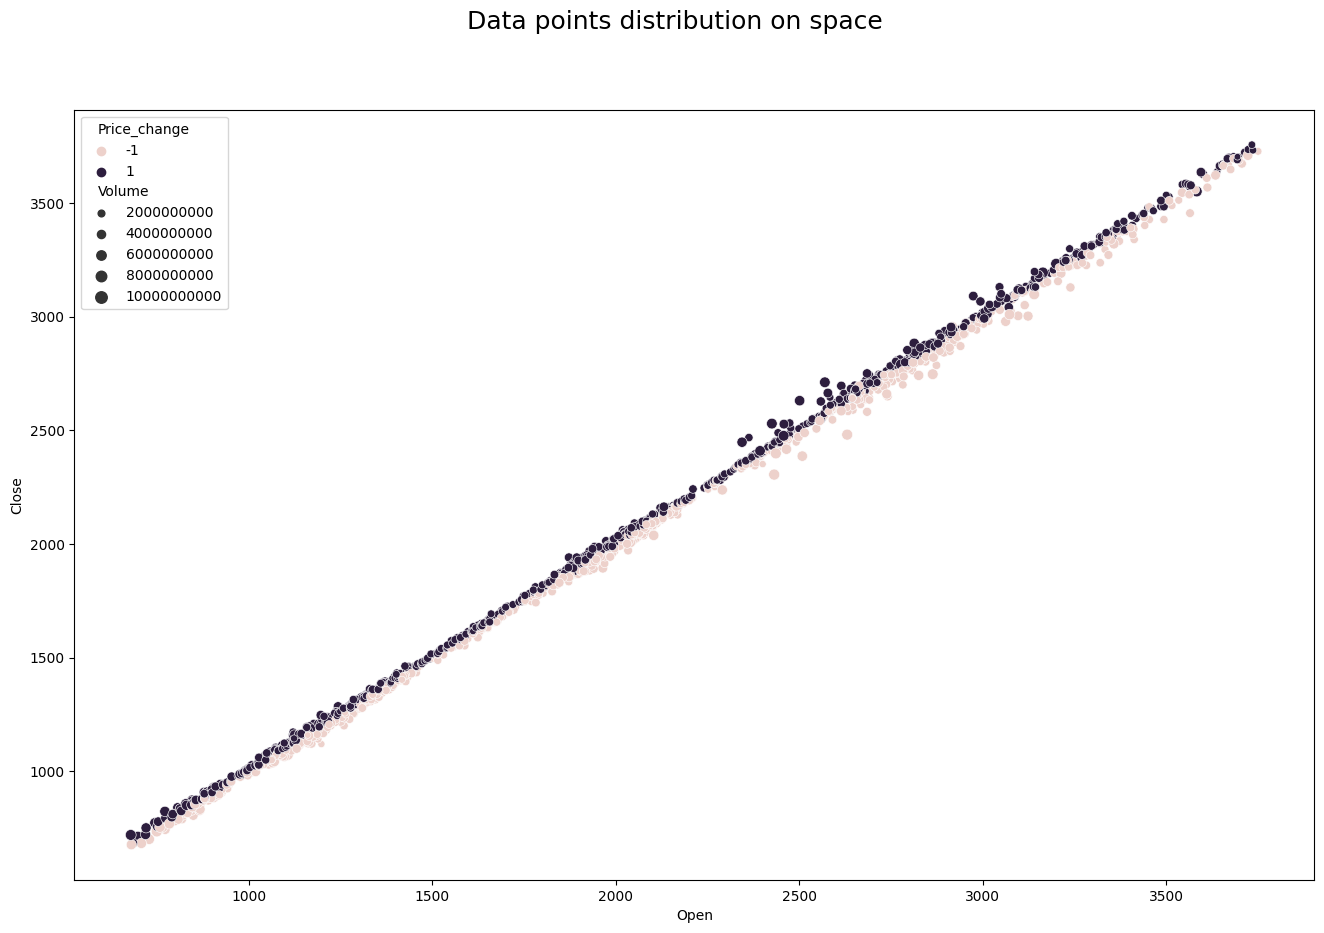

In [35]:
fig , ax = plt.subplots(figsize=(16,10))
fig.suptitle("Data points distribution on space", fontsize=18)
sns.scatterplot(data=data, x="Open", y="Close", size='Volume', hue = 'Price_change')
plt.show()

### Logistic Regression

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  newton-cg


c:\Users\vlieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\vlieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\vlieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\vlieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\vlieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: T

Mean accs :  0.8973591924080984
Mean f1_macro 0.8945751068810555
Mean precision 0.8814637251155956
Mean recall 0.8914675395526459


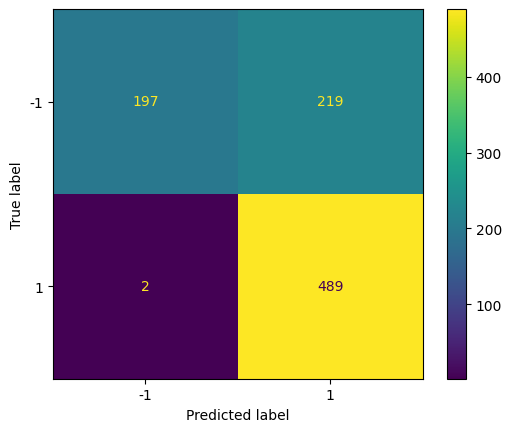

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  lbfgs
Mean accs :  0.5553449183780937
Mean f1_macro 0.35705574912891985
Mean precision 0.5553449183780937
Mean recall 0.5


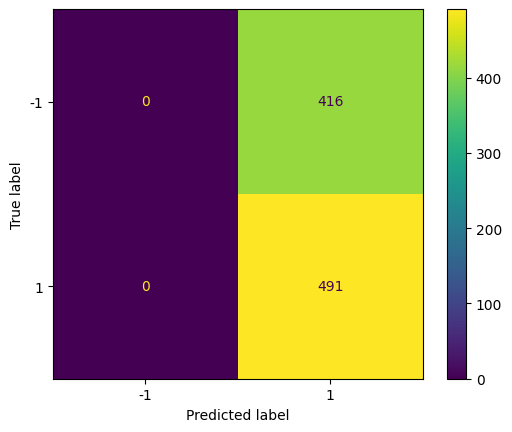

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  liblinear
Mean accs :  0.5553449183780937
Mean f1_macro 0.35705574912891985
Mean precision 0.5553449183780937
Mean recall 0.5


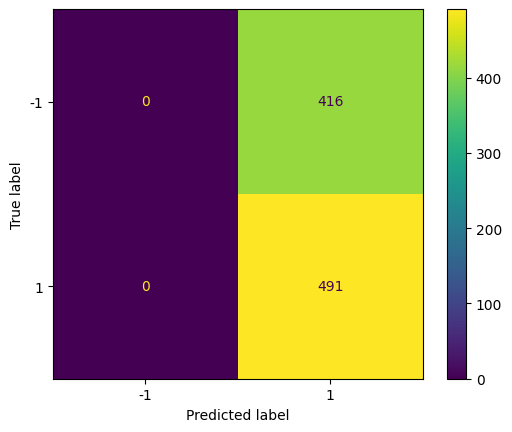

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  sag
Mean accs :  0.5553449183780937
Mean f1_macro 0.35705574912891985
Mean precision 0.5553449183780937
Mean recall 0.5


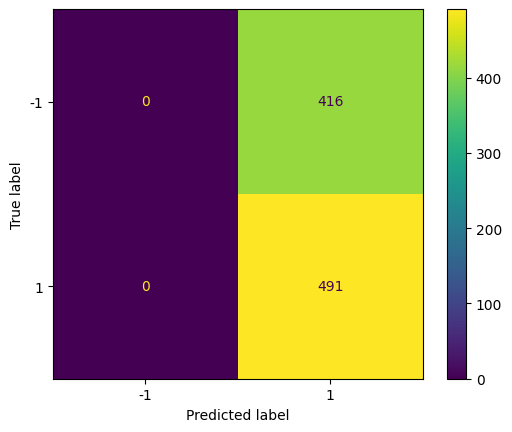

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  saga
Mean accs :  0.5553449183780937
Mean f1_macro 0.35705574912891985
Mean precision 0.5553449183780937
Mean recall 0.5


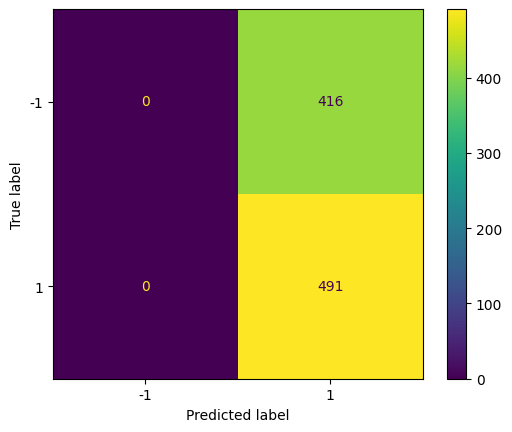

In [36]:
for solver in [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] :
    print("-----------"*10)
    print("Training Logistic Regression with solver ",solver)
    logisticRegr = LogisticRegression(penalty='l2', solver=solver)
    logisticRegr.fit(X_train, y_train)

    # predict model
    # Predict for One Observation
    logisticRegr.predict(X_test[0].reshape(1,-1))

    cv_scores = cross_validate(logisticRegr, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)
    
    predictions = logisticRegr.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logisticRegr.classes_)
    disp.plot()
    plt.show()

In [37]:
logisticRegr = LogisticRegression(penalty='l2', solver='liblinear')
logisticRegr.fit(X_train, y_train)
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy on test set : ",score)

Accuracy on test set :  0.5413450937155457


## Nearest Neighbors

------------------------------------------------------------------------------------------
Training with k =  2
Mean accs :  0.4858133620158426
Mean f1_macro 0.4749313291407783
Mean precision 0.5691236000485141
Mean recall 0.5076986724859065


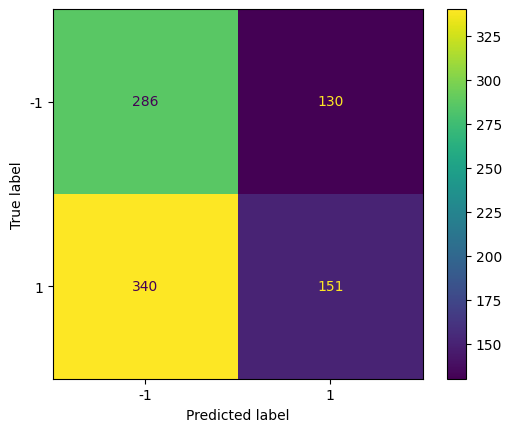

------------------------------------------------------------------------------------------
Training with k =  5
Mean accs :  0.4985681153574669
Mean f1_macro 0.4874933569684125
Mean precision 0.5458618014465304
Mean recall 0.4885288234224404


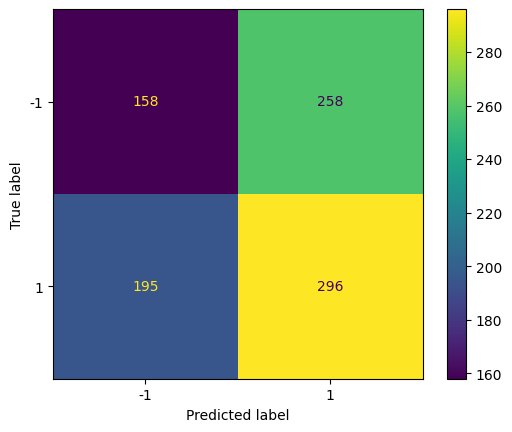

------------------------------------------------------------------------------------------
Training with k =  10
Mean accs :  0.501881169260417
Mean f1_macro 0.5004328670330553
Mean precision 0.55869291958515
Mean recall 0.5030796508456084


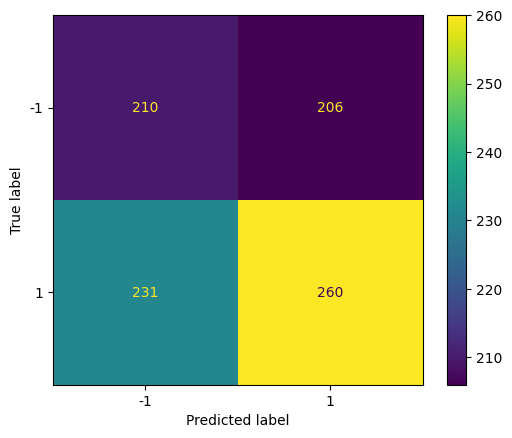

------------------------------------------------------------------------------------------
Training with k =  50
Mean accs :  0.5132320482224687
Mean f1_macro 0.4649817223406546
Mean precision 0.5456508704929369
Mean recall 0.4861274777232224


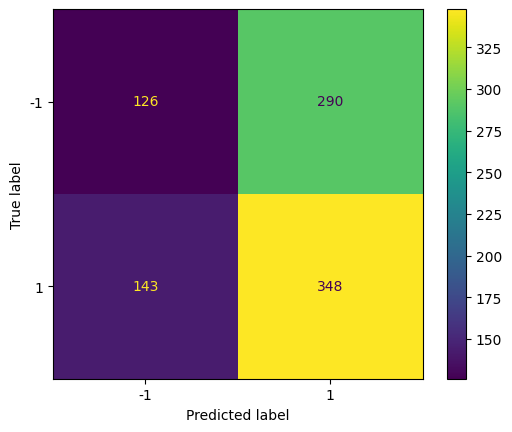

------------------------------------------------------------------------------------------
Training with k =  100
Mean accs :  0.5293245044984483
Mean f1_macro 0.42908552828007274
Mean precision 0.5489144467888952
Mean recall 0.48897344971813056


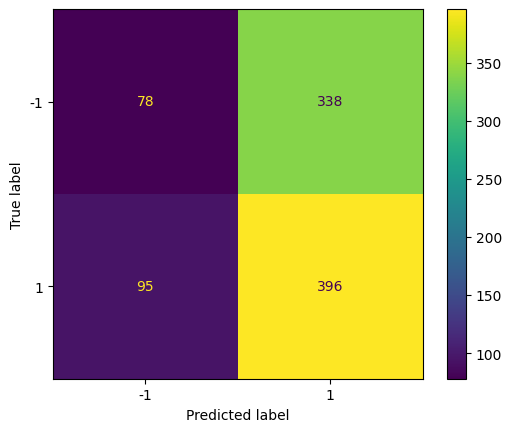

------------------------------------------------------------------------------------------
Training with k =  200
Mean accs :  0.5468309188486661
Mean f1_macro 0.3840058482114644
Mean precision 0.5533504298034585
Mean recall 0.4961374795417349


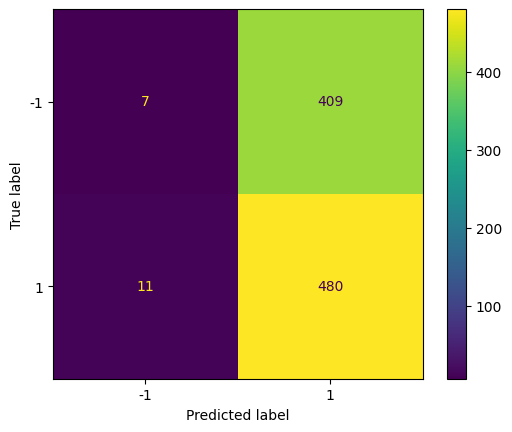

In [38]:
for k in [2, 5 ,10, 50, 100, 200]:
    print("---------"*10)
    print("Training with k = ",k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Cross 5 fold validation
    cv_scores = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = knn.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
    disp.plot()
    plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)
# Use score method to get accuracy of model
score = knn.score(X_test, y_test)
print("Accuracy on test set : ",score)

Accuracy on test set :  0.5369349503858876


## SVM 

------------------------------------------------------------------------------------------
Training SVM with kernel  rbf
Mean accs :  0.55487434596036
Mean f1_macro 0.369994323205726
Mean precision 0.5558638999044332
Mean recall 0.5010620112747772


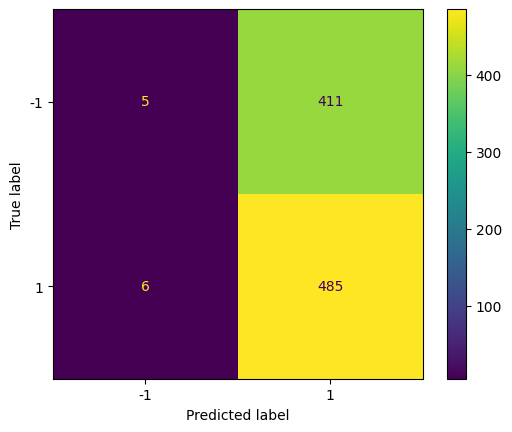

------------------------------------------------------------------------------------------
Training SVM with kernel  poly
Mean accs :  0.5548721051393232
Mean f1_macro 0.3578193362871355
Mean precision 0.5551861882193636
Mean recall 0.49968085106382976


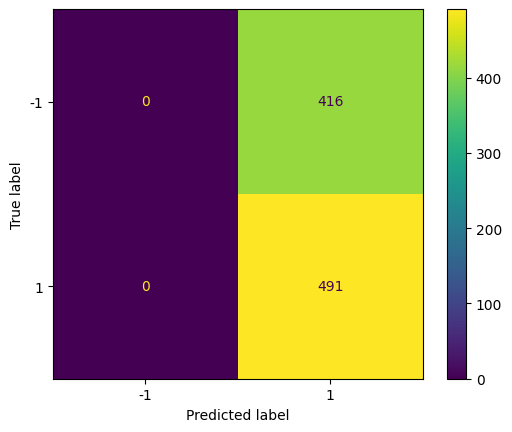

------------------------------------------------------------------------------------------
Training SVM with kernel  sigmoid
Mean accs :  0.48771245784455425
Mean f1_macro 0.48092675867504464
Mean precision 0.5386911312972474
Mean recall 0.48098108747044915


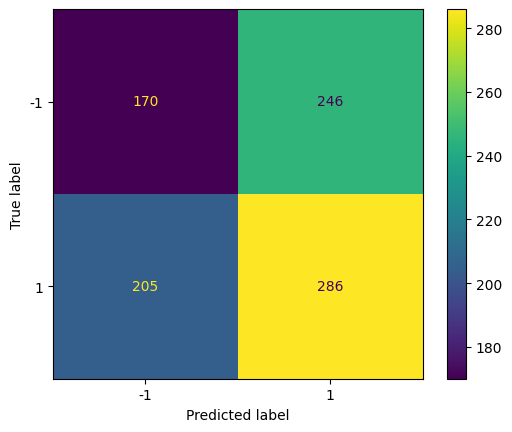

In [40]:
for kernel in {'poly', 'rbf', 'sigmoid'}:
    print("---------"*10)
    print("Training SVM with kernel ", kernel)
    clf = svm.SVC(kernel=kernel, probability=False)
    clf.fit(X_train, y_train)
    
     # Cross 5 fold validation
    cv_scores = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [41]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf.predict(X_test)
print(f'Kernel: rbf, score: {clf.score(X_test, y_test)}')

Kernel: rbf, score: 0.5402425578831312


## Random Forest Classifier

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 2
Mean accs :  0.5365940561545618
Mean f1_macro 0.39054250505940813
Mean precision 0.5529699265515704
Mean recall 0.5010927888491922


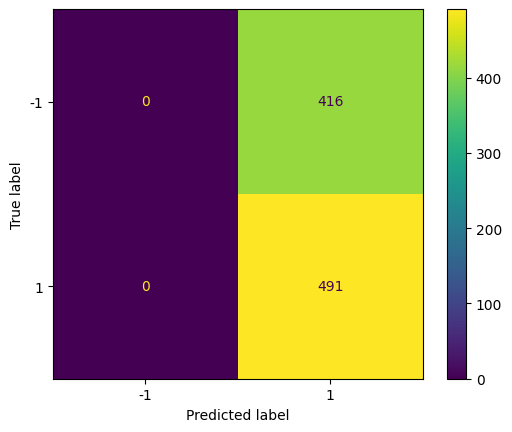

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 3
Mean accs :  0.5389119369492639
Mean f1_macro 0.3961134712905201
Mean precision 0.5542628148340423
Mean recall 0.5036758146794504


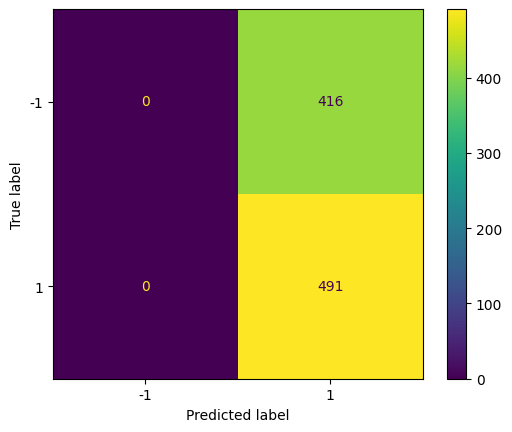

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 5
Mean accs :  0.5286470362870122
Mean f1_macro 0.421640628377267
Mean precision 0.555630195957346
Mean recall 0.5037101663743188


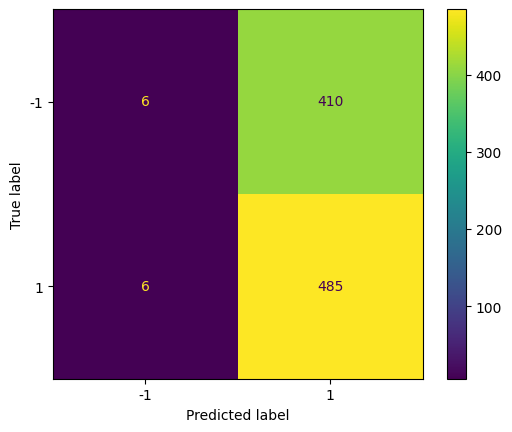

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 10
Mean accs :  0.5326199989053693
Mean f1_macro 0.4299652241888082
Mean precision 0.559020710712047
Mean recall 0.5084735878161644


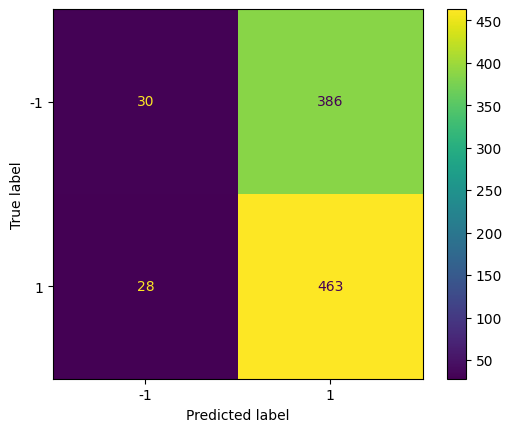

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 15
Mean accs :  0.5382464014011276
Mean f1_macro 0.45990122020426394
Mean precision 0.569691438648469
Mean recall 0.5198817685712628


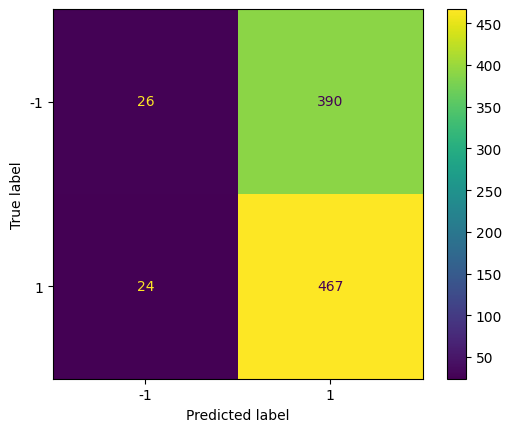

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 20
Mean accs :  0.5130835750643096
Mean f1_macro 0.4444917736684172
Mean precision 0.5842670325575127
Mean recall 0.5133321526975206


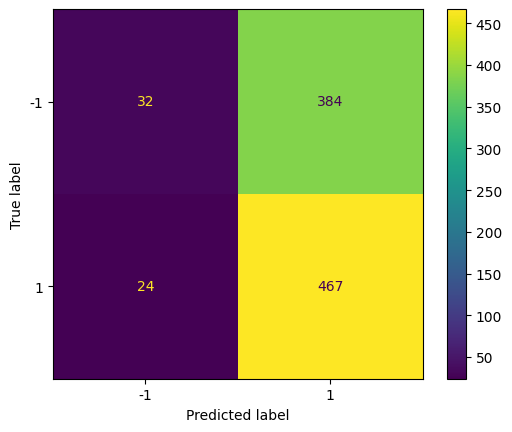

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 50
Mean accs :  0.5551113786875376
Mean f1_macro 0.49443179362267137
Mean precision 0.59068610103267
Mean recall 0.5392008733282881


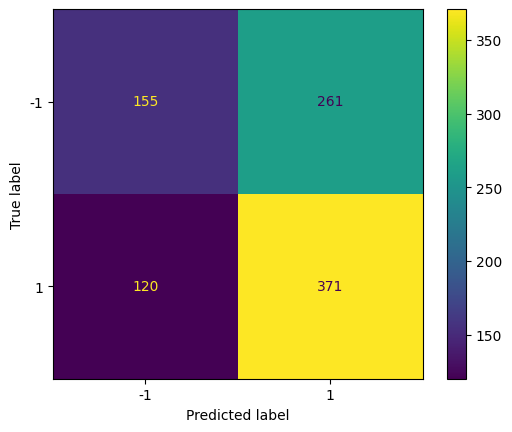

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 2
Mean accs :  0.5365940561545618
Mean f1_macro 0.39054250505940813
Mean precision 0.5529699265515704
Mean recall 0.5010927888491922


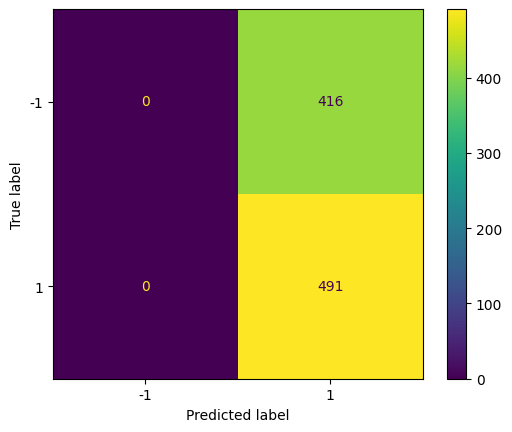

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 3
Mean accs :  0.5415609435717804
Mean f1_macro 0.4021883806500745
Mean precision 0.5557780309826973
Mean recall 0.5066278441997456


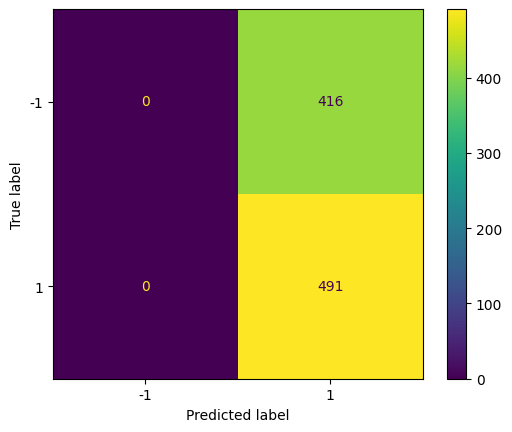

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 5
Mean accs :  0.5432165727108533
Mean f1_macro 0.40583843653260104
Mean precision 0.5567461217797296
Mean recall 0.5084728626499302


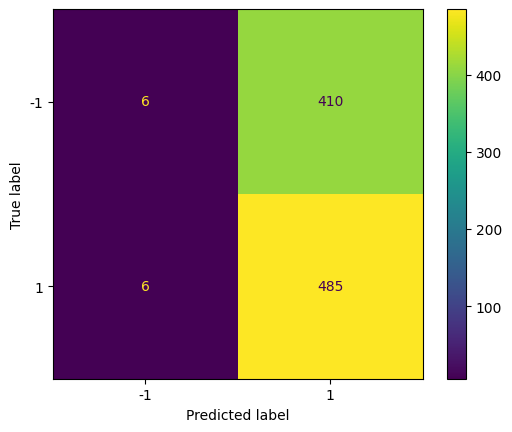

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 10
Mean accs :  0.5465278309889989
Mean f1_macro 0.4442388636535216
Mean precision 0.5631040639301735
Mean recall 0.5193080520829055


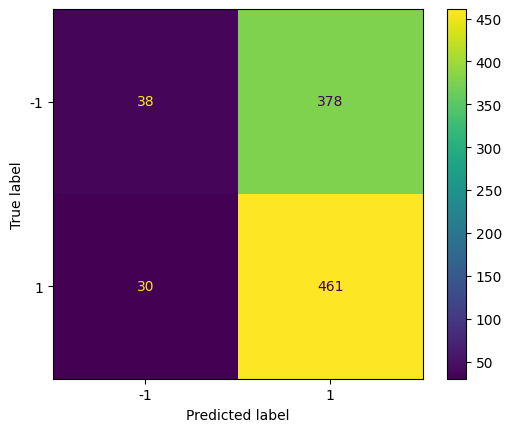

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 15
Mean accs :  0.5478638279240327
Mean f1_macro 0.4116775212289287
Mean precision 0.5542828229228255
Mean recall 0.5196034147344653


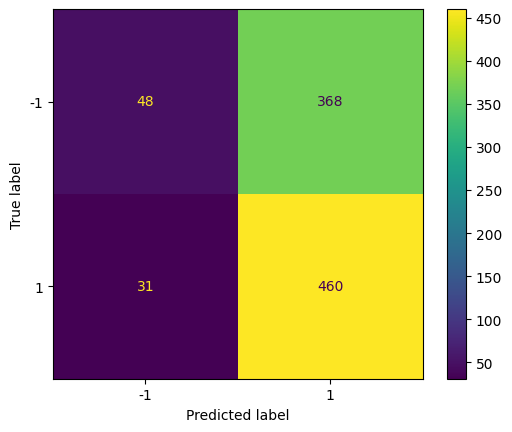

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 20
Mean accs :  0.5448607082261507
Mean f1_macro 0.4432956819409098
Mean precision 0.5535391663720114
Mean recall 0.5125472050626707


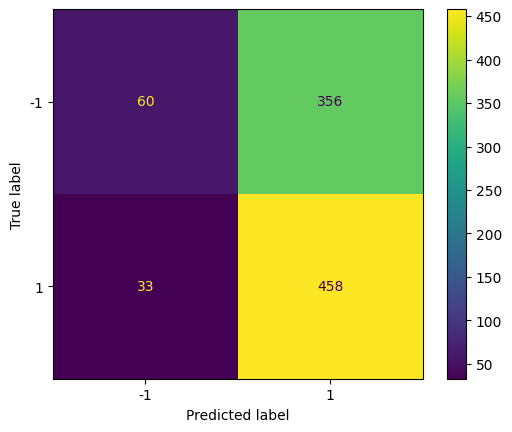

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 50
Mean accs :  0.5395462755185813
Mean f1_macro 0.4723876987334445
Mean precision 0.5995003209796852
Mean recall 0.5384866334752377


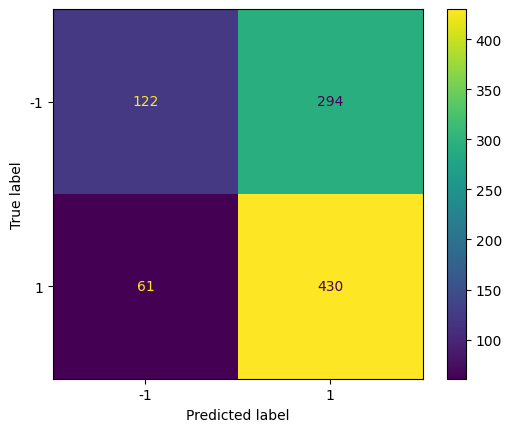

In [42]:
for criterion in ['entropy', 'gini'] :
   # print("---------"*10)
   # print("Training Random Forest with criterion ", criterion)
    
    
    for leafs in [2, 3, 5, 10, 15, 20, 50] :
        print("---------"*10)
        print("Training Random Forest with criterion ", criterion, ",  nodes =",leafs)

        rf = DecisionTreeClassifier(criterion=criterion, max_leaf_nodes=leafs)
        rf.fit(X_train, y_train)

         # Cross 5 fold validation
        cv_scores = cross_validate(rf, X, y, cv=5, scoring=scoring)
        accs = cv_scores['test_accuracy'].mean()
        print("Mean accs : ",accs)
        f1_macros = cv_scores['test_f1_macro'].mean()
        print("Mean f1_macro", f1_macros)
        prec = cv_scores['test_precision'].mean()
        print("Mean precision", prec)
        recall = cv_scores['test_recall'].mean()
        print("Mean recall", recall)

        # cONFUSION matrix
        predictions = rf.predict(X_test)
        cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=rf.classes_)
        disp.plot()
        plt.show()

Accuracy on Test set for 'optimal' random forest is : 0.5413450937155457


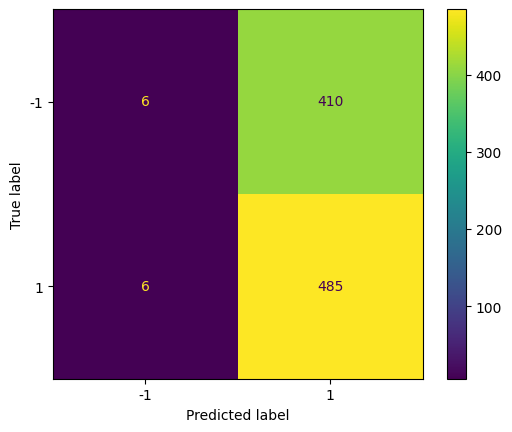

In [43]:
rf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print("Accuracy on Test set for 'optimal' random forest is :", score)
# cONFUSION matrix
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=rf.classes_)
disp.plot()
plt.show()